In [1]:
from IPython.display import Image

----------------
## PANDAS - plots
------------


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
# Reset default params
sns.set()

In [4]:
# Check the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# Use Matplotlib defaults
plt.style.use("seaborn")

In [5]:
location1 = r"D:\\MYLEARN\\datasets\\gdp.csv"
location2 = r"D:\\MYLEARN\\datasets\\iris.csv"
location3 = r"D:\\MYLEARN\\datasets\\tips.csv"

In [6]:
df_gdp  = pd.read_csv(location1)
df_iris = pd.read_csv(location2)
df_tips = pd.read_csv(location3)

In [7]:
df_gdp.head(3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [8]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
df_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### Ex 1 - plot

If we graph using just `.plot`, it’s going to use the row/index number as the X axis on the chart.

the plot makes no clear sense

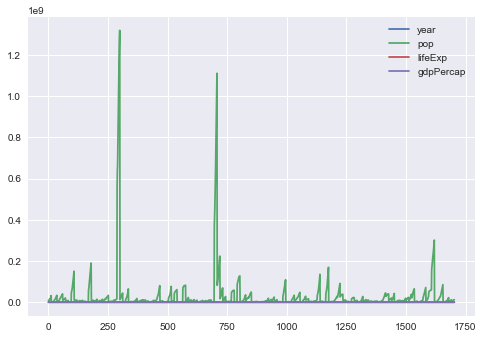

In [11]:
df_gdp.plot();

#### Ex 2 - line plots

- average gdp per capita for each country, for Asia

- When you do a groupby and summarize a column, you get a Series, not a dataframe.

> Notice the series has index as country name

In [10]:
df_cntry = df_gdp[df_gdp['continent']=='Asia'].groupby("country")['gdpPercap'].mean()
df_cntnt = df_gdp.groupby("continent")['gdpPercap'].mean()

In [11]:
df_cntry.head(3)

country
Afghanistan      802.674598
Bahrain        18077.663945
Bangladesh       817.558818
Name: gdpPercap, dtype: float64

In [14]:
df_cntnt.head(3)

continent
Africa      2193.754578
Americas    7136.110356
Asia        7902.150428
Name: gdpPercap, dtype: float64

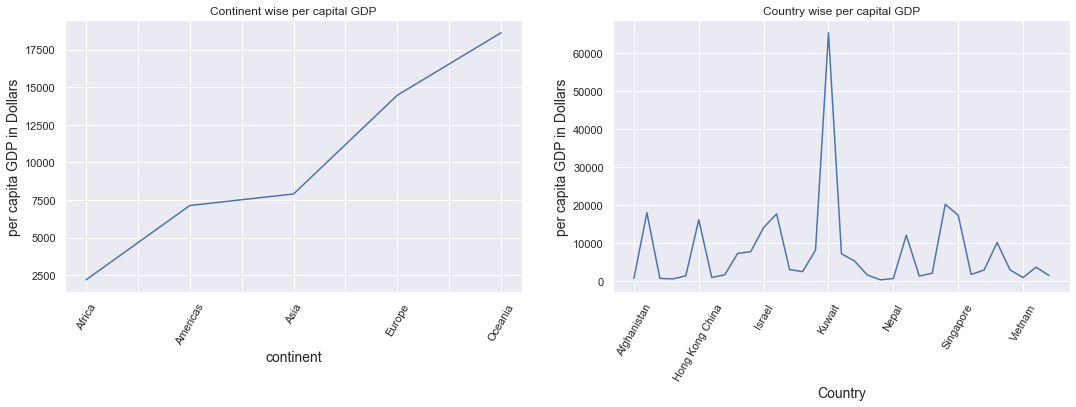

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

# plot 1
df_cntnt.plot(kind='line', rot=60, ax=ax1)

# add a title
ax1.set_title("Continent wise per capital GDP")

# add a label to the y-axis
ax1.set_ylabel("per capita GDP in Dollars", fontsize=14)

# add a label to the x-axis
ax1.set_xlabel("continent", fontsize=14)

# plot 2
df_cntry.plot(kind='line', rot=60, ax=ax2)

# add a title
ax2.set_title("Country wise per capital GDP")

# add a label to the y-axis
ax2.set_ylabel("per capita GDP in Dollars", fontsize=14)

# add a label to the x-axis
ax2.set_xlabel("Country", fontsize=14);

#### Ex 3 - scatter plots

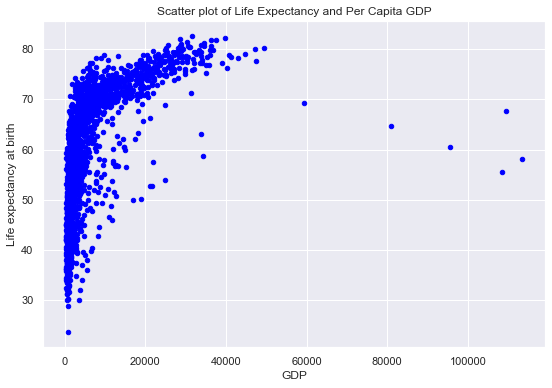

In [13]:
ax = df_gdp.plot(kind='scatter', 
                x='gdpPercap', 
                y='lifeExp', 
                figsize=(9,6),
                title= 'Scatter plot of Life Expectancy and Per Capita GDP',
                grid=True,
                legend=True,
                color='blue',       
       );

# Set the x-axis label
ax.set_xlabel("GDP")

# Set the y-axis label
ax.set_ylabel("Life expectancy at birth");

#### Ex 4 - lmplots

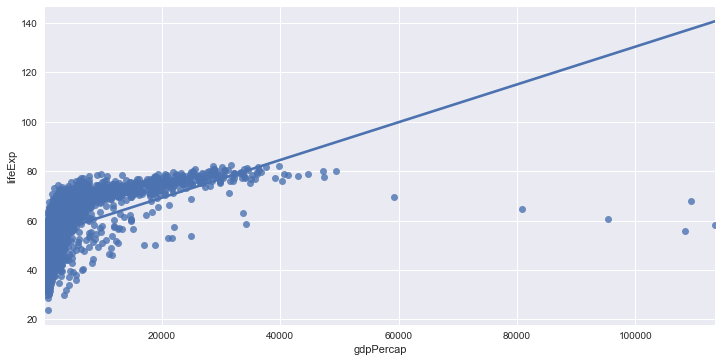

In [17]:
sns.lmplot(x='gdpPercap', y='lifeExp', data=df_gdp, ci=None, height=5, aspect=2);

#### Ex 5 - plot bar graphs for gdppercapita of India

In [41]:
# get the data for India, gets the slice off the main df
df_india = df_gdp.loc[df_gdp['country']=='India']

# The drop argument on the reset_index(drop=True) restricts the function from inserting the 
# old index as a column in the resulting DataFrame.
df_india = df_india.reset_index(drop=True)

# sort this by year
df_india.sort_values('year', ascending=True, inplace=True)

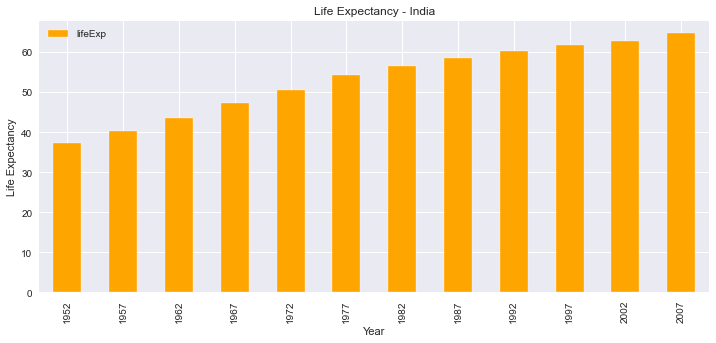

In [42]:
# kind='bar' or 'barh'
ax = df_india.plot(kind='bar', 
        x='year', 
        y=['lifeExp'],
        figsize=(12,5),
        title= 'Life Expectancy - India',
        grid=True,
        legend=True,
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Life Expectancy");

#### Ex 6 - box plot (iris)

In [15]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


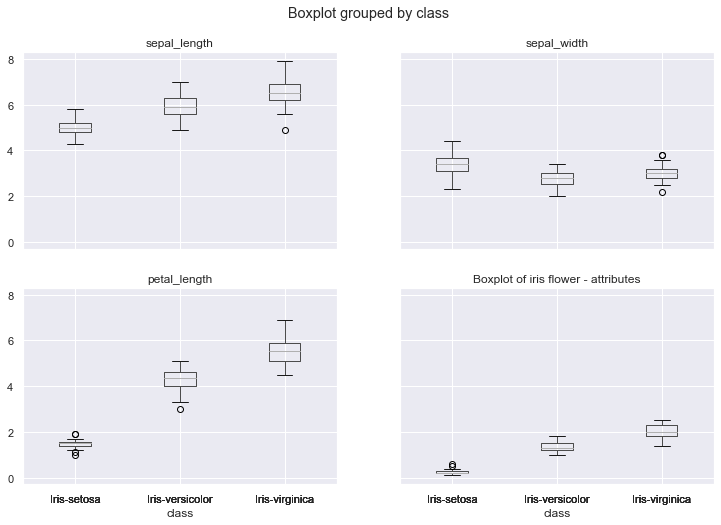

In [14]:
ax = df_iris.boxplot(
        column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
        by='class',
        figsize=(16, 8),     
        grid=True 
       );

plt.title("Boxplot of iris flower - attributes");

#### Ex 7 - pair plots

In [16]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


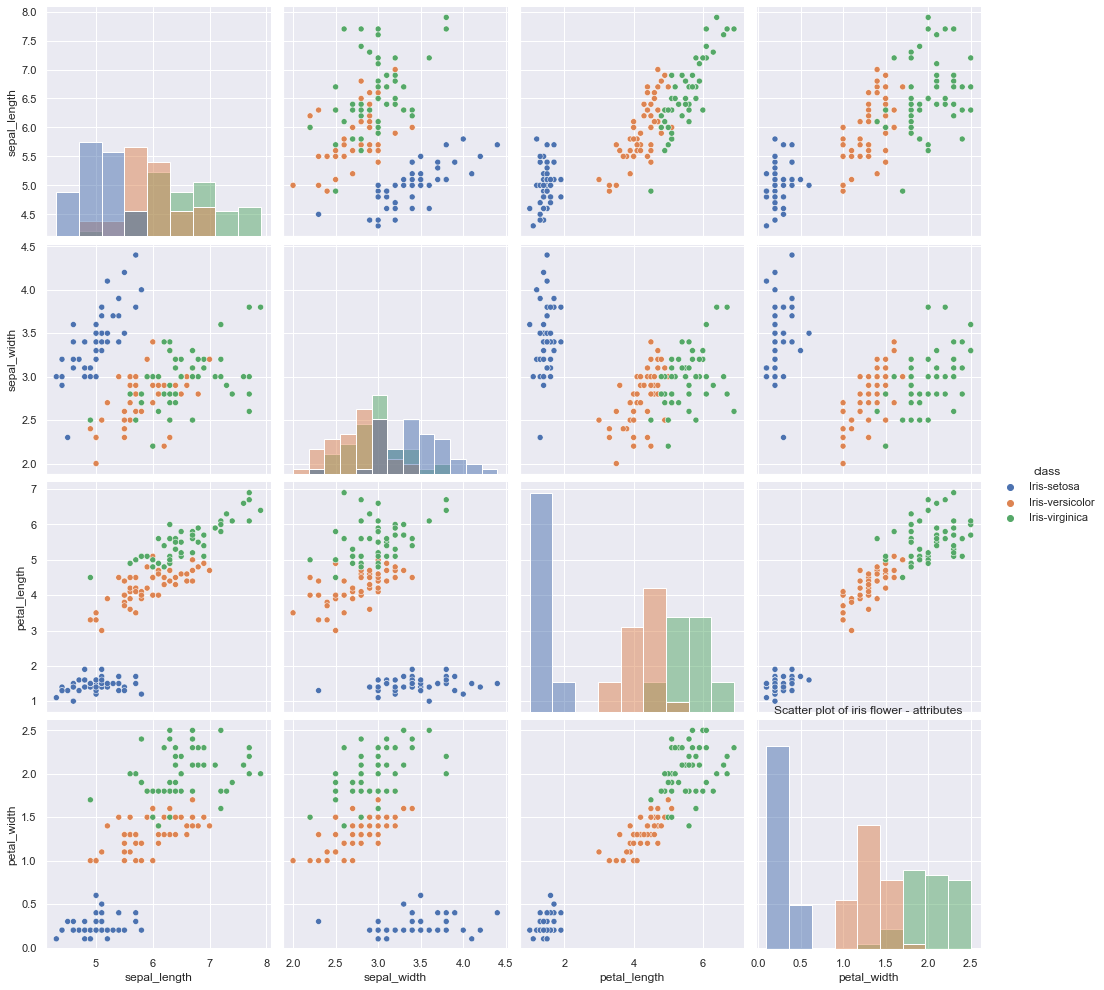

In [17]:
sns.pairplot(df_iris, hue='class', height=3.5, diag_kind="hist")

plt.title("Scatter plot of iris flower - attributes");

#### Ex 7 - US flight delays dataset

In [22]:
location = r'D:\MYLEARN\DATASETS\US-flights-delays\flights.csv'

In [23]:
data = pd.read_csv(location, low_memory=False)

In [24]:
data.shape

(5819079, 31)

In [25]:
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [26]:
data = data.fillna(np.nan)

In [27]:
data.sample(n=5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1888701,2015,5,1,5,UA,332,N458UA,EWR,IAH,500,...,736.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4345370,2015,9,28,1,WN,2078,N269WN,SFO,LAS,1325,...,1451.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3622346,2015,8,13,4,OO,3469,N216AG,OMA,SEA,1510,...,1633.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4572135,2015,10,12,1,UA,1270,N75426,12892,13930,1846,...,54.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2682060,2015,6,18,4,OO,4554,N817SK,MSP,FAR,1534,...,1630.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.sort_values(by='ARRIVAL_DELAY', ascending=False)[:10]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
337720,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,...,1805.0,1971.0,0,0,NaN,0.0,0.0,1971.0,0.0,0.0
3412085,2015,8,1,6,AA,96,N479AA,RIC,DFW,709,...,1652.0,1898.0,0,0,NaN,20.0,0.0,1878.0,0.0,0.0
4103531,2015,9,13,7,AA,1063,N3CAAA,SAN,DFW,700,...,1544.0,1665.0,0,0,NaN,0.0,0.0,1665.0,0.0,0.0
5279939,2015,11,27,5,AA,2559,N489AA,DTW,ORD,1027,...,1407.0,1638.0,0,0,NaN,7.0,0.0,1631.0,0.0,0.0
3100911,2015,7,13,1,AA,1319,N3LEAA,IND,LAX,1905,...,2349.0,1636.0,0,0,NaN,11.0,0.0,1625.0,0.0,0.0
5810811,2015,12,31,4,AA,2214,N4XKAA,ABQ,DFW,1041,...,1641.0,1636.0,0,0,NaN,0.0,0.0,1636.0,0.0,0.0
886984,2015,2,28,6,AA,1312,N028AA,STL,MIA,620,...,1315.0,1627.0,0,0,NaN,40.0,0.0,1587.0,0.0,0.0
1278418,2015,3,24,2,AA,1279,N559AA,OMA,DFW,1103,...,1533.0,1598.0,0,0,NaN,0.0,0.0,1563.0,35.0,0.0
264495,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,...,1519.0,1593.0,0,0,NaN,0.0,0.0,1593.0,0.0,0.0
949876,2015,3,4,3,AA,270,N5DJAA,HNL,LAX,828,...,1811.0,1576.0,0,0,NaN,0.0,0.0,1576.0,0.0,0.0


- The longest delay was 1971.0 minutes— more than a whole day! 

- The worst delays occurred on American Airlines flights to DFW (Dallas-Fort Worth), and they don't seem to have been delayed due to weather (you can tell because the values in the `weather_delay` column are 0).

#### Ex 8

January can be a tough time for flying—snowstorms in New England and the Midwest delayed travel at the beginning of the month as people got back to work. But how often did delays occur from January 1st-15th?

In [29]:
def is_delayed(x):
    return x > 0

In [30]:
data['delayed'] = data['ARRIVAL_DELAY'].apply(is_delayed)

In [31]:
data['delayed'].head(4)

0    False
1    False
2     True
3    False
Name: delayed, dtype: bool

For very `short functions or functions that you do not intend to use multiple times`, naming the function may not be necessary. 

The function used above could be written more quickly as a `lambda` function, or a function without a name.

In [32]:
data['delayed'] = data['ARRIVAL_DELAY'].apply(lambda x: x > 0)

Let's break it down:

- `lambda` — this is a lambda function
- x: — the parameter name within the function
- x > 0 — what to do with the parameter

- What is x? 
    - The `.apply()` method is going through `every record one-by-one` in the data['ARRIVAL_DELAY'] series, where x is each record. 
    - Just as the def function does above, the `lambda` function checks if the value of each ARRIVAL_DELAY record is greater than zero, then returns True or False.

#### Ex 9 

- Calculating percentages
Now that you have determined whether or not each flight was `delayed`, you can get some information about the aggregate trends in flight delays.

Count the values in this new column to see what proportion of flights are delayed:

In [33]:
data['delayed'].value_counts()

False    3732183
True     2086896
Name: delayed, dtype: int64

The value_counts() method actually returns the two numbers, ordered from largest to smallest. You can use them to calculate the `percentage of flights that were delayed`:

In [37]:
not_delayed = data['delayed'].value_counts()[0] # first value of the result above
delayed     = data['delayed'].value_counts()[1] # second value of the result above

total_flights = not_delayed + delayed # total count of flights

print ((float(delayed) / total_flights) *100) # converting to float to get a float result

35.8629948141278


##### Ex 

Grouping data by categorical values
If half of the flights were delayed, were delays shorter or longer on some airlines as opposed to others? To compare delays across airlines, we need to group the records of airlines together.

#### Summarize

`Line Plot:`

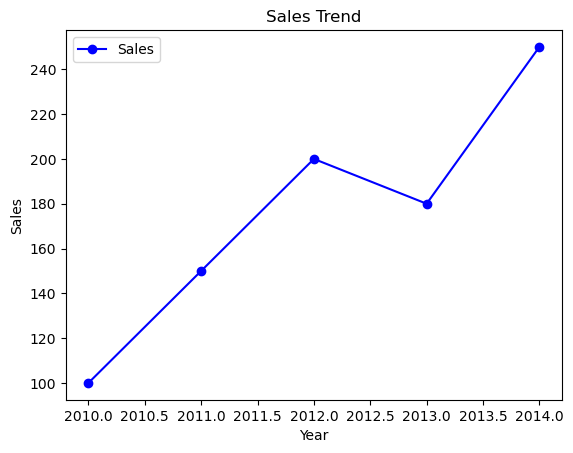

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Sales': [100, 150, 200, 180, 250]
}

df = pd.DataFrame(data)

# Plotting line chart
df.plot(x='Year', y='Sales', marker='o', color='blue')
plt.title('Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


`Bar Plot`

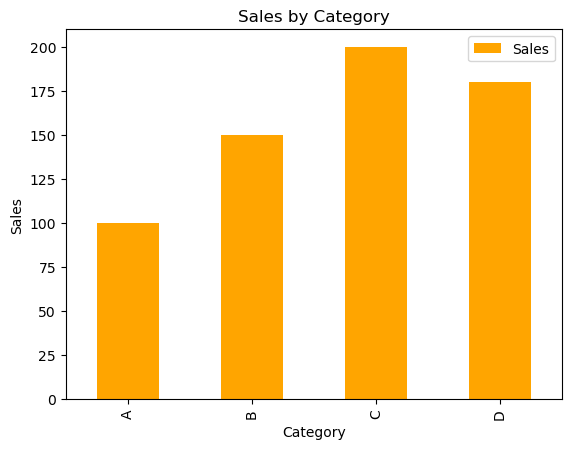

In [2]:
# Sample DataFrame
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Sales': [100, 150, 200, 180]
}

df = pd.DataFrame(data)

# Plotting bar chart
df.plot(x='Category', y='Sales', kind='bar', color='orange')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


`Histogram`

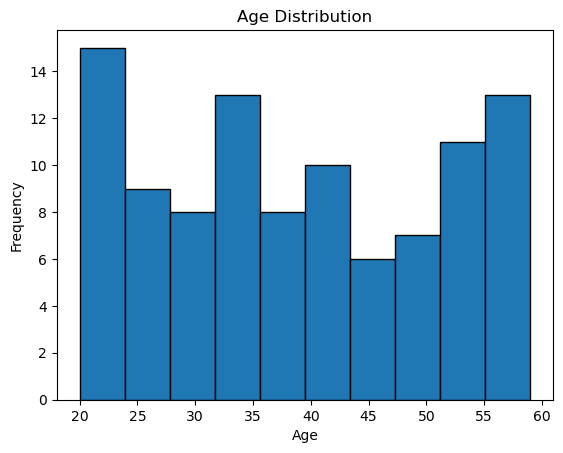

In [3]:
import numpy as np

# Sample DataFrame with random data
np.random.seed(0)
data = {
    'Age': np.random.randint(20, 60, 100)
}

df = pd.DataFrame(data)

# Plotting histogram
df['Age'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


`Scatter Plot`

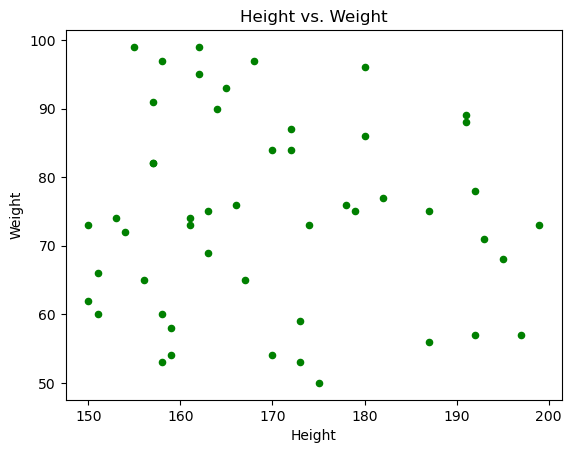

In [4]:
# Sample DataFrame with random data
np.random.seed(1)
data = {
    'Height': np.random.randint(150, 200, 50),
    'Weight': np.random.randint(50, 100, 50)
}

df = pd.DataFrame(data)

# Plotting scatter plot
df.plot(x='Height', y='Weight', kind='scatter', color='green')
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


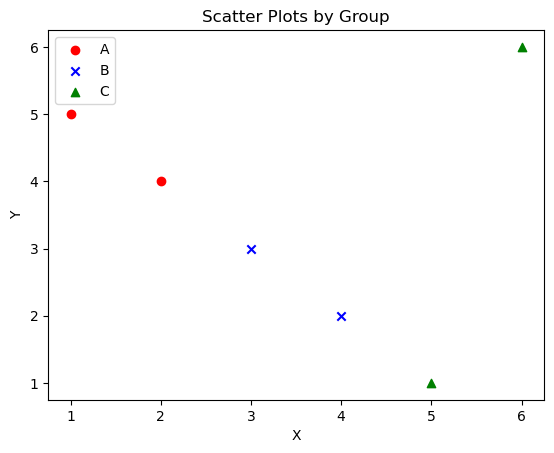

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Group': ['A', 'A', 'B', 'B', 'C', 'C'],
    'X': [1, 2, 3, 4, 5, 6],
    'Y': [5, 4, 3, 2, 1, 6]
}

df = pd.DataFrame(data)

# Group by 'Group' column
groups = df.groupby('Group')

# Plot scatter plots for each group
colors = ['red', 'blue', 'green']  # Define colors for each group
markers = ['o', 'x', '^']  # Define markers for each group

for i, (group, data) in enumerate(groups):
    plt.scatter(data['X'], data['Y'], label=group, color=colors[i], marker=markers[i])

plt.title('Scatter Plots by Group')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
